In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import widgets
import warnings

warnings.filterwarnings('ignore')

## Loading The Data

In [5]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [6]:
df.shape

(48895, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Null Value Checking

In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
round(100*(df.isnull().sum()/len(df)),2)

id                                 0.00
name                               0.03
host_id                            0.00
host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.56
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

In [12]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [15]:
df.fillna({'reviews_per_month':0}, inplace=True)

In [16]:
df.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

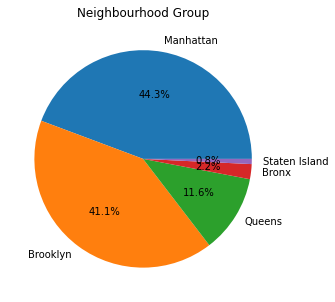

In [19]:
plt.figure(figsize=(10,5))
plt.title("Neighbourhood Group")
g = plt.pie(df.neighbourhood_group.value_counts(), labels=df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=0)
plt.show()

Manhattan and Brooklyn are the most demanded neighbourhood_group as the percentage of bookings is higher.

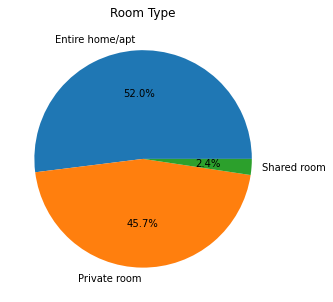

In [21]:
plt.figure(figsize=(10,5))
plt.title("Room Type")
g = plt.pie(df.room_type.value_counts(), labels=df.room_type.value_counts().index,autopct='%1.1f%%', startangle=0)
plt.show()

Customer showed more interest in Entire home/apt & Private room. 

In [22]:
price_labels = ["Very cheap", "Cheap", "Moderate", "Expensive", "Very expesive"]
df['price_bin'] = pd.qcut(df['price'], [0, .2, .4, .6, .8, 1.], labels=price_labels)

In [23]:
df['price_bin'].value_counts()

Expensive        10809
Very cheap       10063
Cheap             9835
Moderate          9804
Very expesive     8384
Name: price_bin, dtype: int64

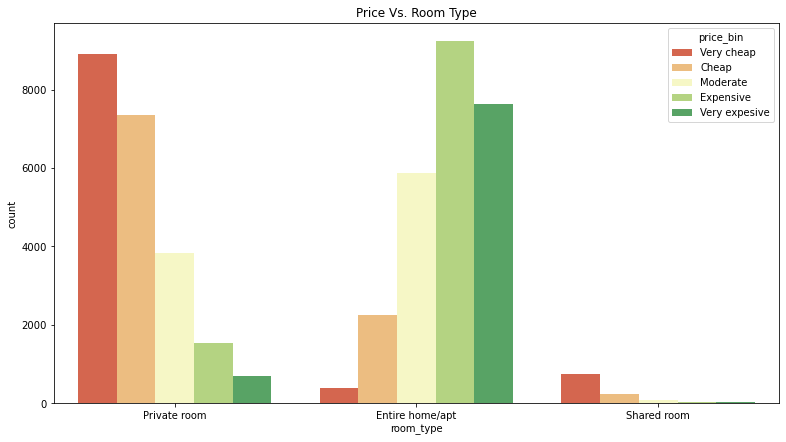

In [32]:
plt.figure(figsize=(13,7))
plt.title("Price Vs. Room Type")
sns.countplot(df.room_type,hue=df.price_bin, palette="RdYlGn")
plt.show()

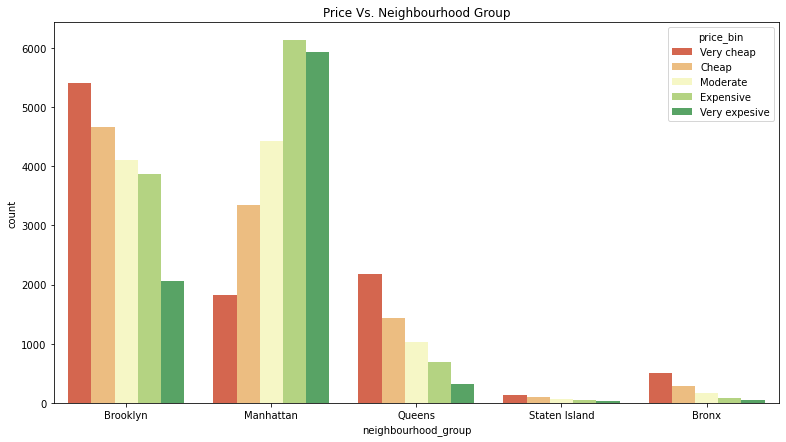

In [33]:
plt.figure(figsize=(13,7))
plt.title("Price Vs. Neighbourhood Group")
sns.countplot(df.neighbourhood_group,hue=df.price_bin, palette="RdYlGn")
plt.show()

<AxesSubplot:title={'center':'Price range'}, xlabel='longitude', ylabel='latitude'>

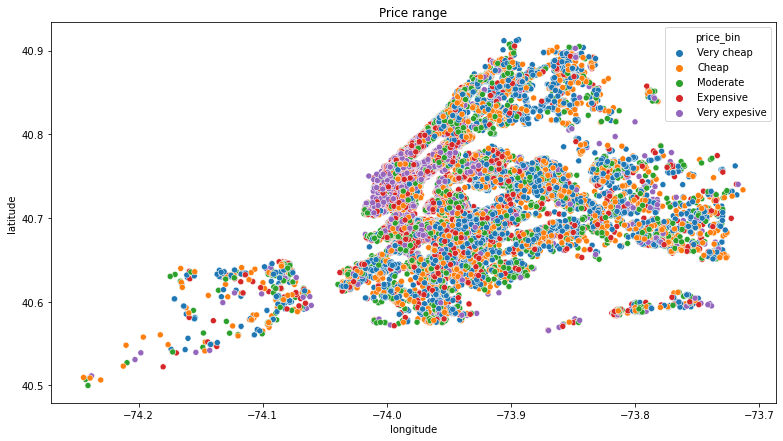

In [38]:
plt.figure(figsize=(13,7))
plt.title("Price range")
sns.scatterplot(data=df, x="longitude", y="latitude", hue="price_bin")

In [41]:
import folium

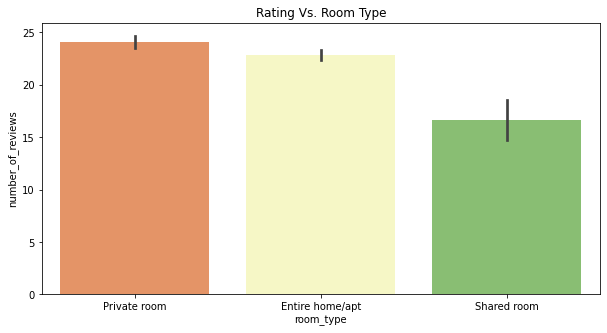

In [45]:
plt.figure(figsize=(10,5))
plt.title("Ratings Vs. Room Type")
sns.barplot(x='room_type', y="number_of_reviews", data=df, palette='RdYlGn')
plt.show()